In [15]:
from genn.model import GENN
from genn.data import load_csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%matplotlib inline

# Tutorial 2: Two-Dimensional Rastrigin

Our goal will be to teach a neural network to predict the Rastrigin function, which is a challenging multi-modal function that somewhat ressembles an egg-crate. Mathematically, the Rastrigin function is defined as: 

$$f(x_1 \cdots x_n) = 10n + \sum_{i=1}^n (x_i^2 -10cos(2\pi x_i))$$

It's contour plot can be generated as follows, where one can visually see the multi-modal nature of the function:

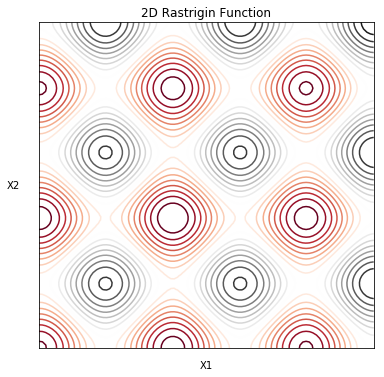

In [14]:
def make_contour_plot(): 
    # Domain
    lb = -1.
    ub = 1.5
    m = 100
    x1 = np.linspace(lb, ub, m)
    x2 = np.linspace(lb, ub, m)
    X1, X2 = np.meshgrid(x1, x2)

    # True response
    pi = np.pi
    Y_true = np.power(X1, 2) - 10 * np.cos(2 * pi * X1) + 10 + np.power(X2, 2) - 10 * np.cos(2 * pi * X2) + 10

    # Prepare to plot
    fig = plt.figure(figsize=(6, 6))
    spec = gridspec.GridSpec(ncols=1, nrows=1, wspace=0)

    # Plot Truth model
    ax1 = fig.add_subplot(spec[0, 0])
    ax1.contour(X1, X2, Y_true, 20, cmap='RdGy')
    anno_opts = dict(xy=(0.5, 1.075), xycoords='axes fraction', va='center', ha='center')
    anno_opts = dict(xy=(-0.075, 0.5), xycoords='axes fraction', va='center', ha='center')
    ax1.annotate('X2', **anno_opts)
    anno_opts = dict(xy=(0.5, -0.05), xycoords='axes fraction', va='center', ha='center')
    ax1.annotate('X1', **anno_opts)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlim(lb, ub)
    ax1.set_ylim(lb, ub)
    ax1.set_title('2D Rastrigin Function')
    
make_contour_plot()

## Step 1: Load Training and Test Data

GENN uses numpy and, therefore, the training data must be provided as numpy arrays where $m$ is the number of samples in the data set, $n_x$ is the number of inputs, and $n_y$ is the number outputs: 

* $X$ = sample inputs of shape $(n_x, m)$
* $Y$ = sample outputs of shape $(n_y, m)$
* $J$ = sample jacobian of shape $(n_y, n_x, m)$

This information can be provided directly in code (as was done for Tutorial 1) or it can be read in from a CSV file, which is often the most convenient. One can either write their own custom function to load the CSV file in the proper format, or use the 'load_csv()' support functions that comes with the release. In this case, the CSV should contain only one header row, where the labels clearly indicate the individual inputs, outputs, and associated jacobian terms as given in the following snapshot for a two-dimensional problem with one output:

![](csv_data_format.png)

We will now read in training and test data that was generated offline for the Rastrigin function: 

In [18]:
X_train, Y_train, J_train = load_csv(file='demo_train_data.csv', inputs=["X[0]", "X[1]"], outputs=["Y[0]"], partials=[["J[0][0]", "J[0][1]"]])
X_test, Y_test, J_test = load_csv(file='demo_test_data.csv', inputs=["X[0]", "X[1]"], outputs=["Y[0]"], partials=[["J[0][0]", "J[0][1]"]])

## Step 2: Initialize the Model 

We now initalize the model, where $deep \ge 1$ and $wide \ge 1$ are the number of layers in the neural network and the number of nodes per layer, respectively. Feel free to try different network architectures. The parameters $n_x \ge 1$ and $n_y \ge 1$ are the number of inputs and outputs, respectively. 

In [19]:
model = GENN.initialize(n_x=X_train.shape[0], n_y=Y_train.shape[0], deep=3, wide=6)

## Step 3: Train the Model

Now that the model has been initialized, we can train it. To do so, the user only needs to provide training data and tune the hyper-parameters that control the behavior of the training algorithm. They are listed here-under:

In [20]:
model.train(X=X_train,
            Y=Y_train,
            J=J_train,
            alpha=0.05,  # optimizer learning rate (control line search step size)
            lambd=0.1,   # regularization coefficient (to avoid over-fitting)
            gamma=1.0,   # gradient-enhancement coefficient (set gamma = 0 to turn off gradient enhancement)
            beta1=0.9,   # tuning parameter for ADAM optimization (recommended value is 0.9)
            beta2=0.99,  # tuning parameter for ADAM optimization (recommended value is 0.99)
            mini_batch_size=64,    # if not None, the data will be broken up into batches of specified size
            num_iterations=100,    # number of optimizer iterations per mini batch
            num_epochs=10)         # number of passes through the data  

epoch = 0, mini-batch = 0, avg cost =  4.844
epoch = 0, mini-batch = 1, avg cost =  2.476
epoch = 0, mini-batch = 2, avg cost =  0.946
epoch = 0, mini-batch = 3, avg cost =  0.796
epoch = 1, mini-batch = 0, avg cost =  0.500
epoch = 1, mini-batch = 1, avg cost =  0.434
epoch = 1, mini-batch = 2, avg cost =  0.348
epoch = 1, mini-batch = 3, avg cost =  0.439
epoch = 2, mini-batch = 0, avg cost =  0.410
epoch = 2, mini-batch = 1, avg cost =  0.308
epoch = 2, mini-batch = 2, avg cost =  0.319
epoch = 2, mini-batch = 3, avg cost =  0.367
epoch = 3, mini-batch = 0, avg cost =  0.307
epoch = 3, mini-batch = 1, avg cost =  0.287
epoch = 3, mini-batch = 2, avg cost =  0.320
epoch = 3, mini-batch = 3, avg cost =  0.369
epoch = 4, mini-batch = 0, avg cost =  0.252
epoch = 4, mini-batch = 1, avg cost =  0.293
epoch = 4, mini-batch = 2, avg cost =  0.288
epoch = 4, mini-batch = 3, avg cost =  0.382
epoch = 5, mini-batch = 0, avg cost =  0.290
epoch = 5, mini-batch = 1, avg cost =  0.256
epoch = 5,

It is good practice to check the convergence history in order to see if we should keep training:

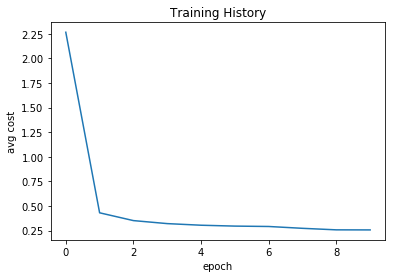

In [23]:
model.plot_training_history()

## Step 4: Check Goodness of Fit

Upon convergence, we now check the goodness of fit using the test data we generated earlier:

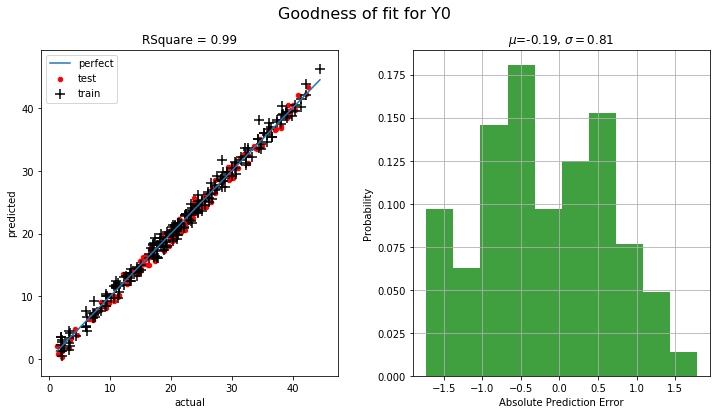

{'R_squared': array(0.99), 'avg_error': array(-0.19), 'std_error': array(0.81)}

In [24]:
model.goodness_of_fit(X_test, Y_test)

We can also check the goodness of fit of the first partial derivative:

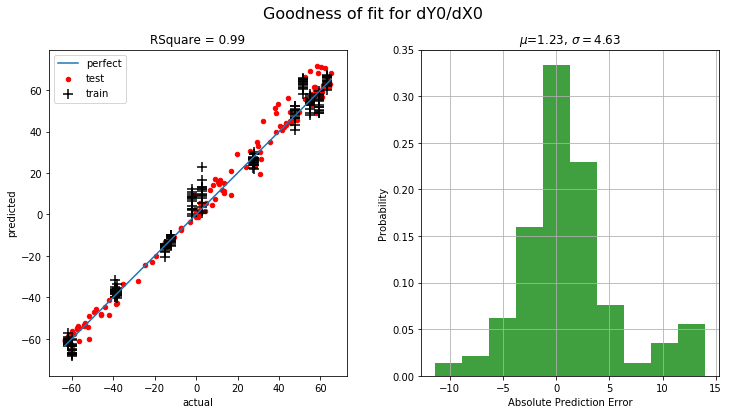

{'R_squared': array(0.99), 'avg_error': array(1.23), 'std_error': array(4.63)}

In [26]:
model.goodness_of_fit(X_test, Y_test, J_test, partial=0)

As well as the second partial derivative:

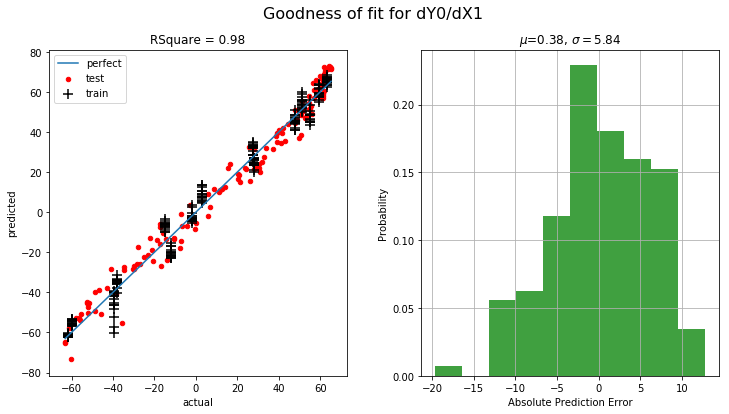

{'R_squared': array(0.98), 'avg_error': array(0.38), 'std_error': array(5.84)}

In [27]:
model.goodness_of_fit(X_test, Y_test, J_test, partial=1)

## Step 5: Plot Results

Finally, since this is a two-dimensional function, we can compare the contour plots of the predicted and true response:

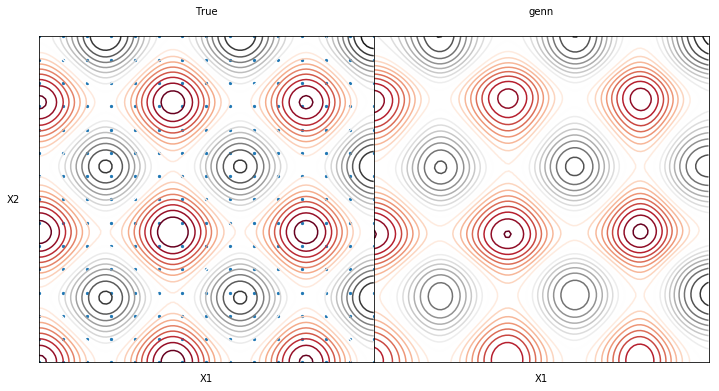

In [29]:
def contour_plot(model, title='genn'):
    """Make contour plots of 2D Rastrigin function and compare to Neural Net prediction"""

    X_train, _, _ = model.training_data

    # Domain
    lb = -1.
    ub = 1.5
    m = 100
    x1 = np.linspace(lb, ub, m)
    x2 = np.linspace(lb, ub, m)
    X1, X2 = np.meshgrid(x1, x2)

    # True response
    pi = np.pi
    Y_true = np.power(X1, 2) - 10 * np.cos(2 * pi * X1) + 10 + np.power(X2, 2) - 10 * np.cos(2 * pi * X2) + 10

    # Predicted response
    Y_pred = np.zeros((m, m))
    for i in range(0, m):
        for j in range(0, m):
            Y_pred[i, j] = model.evaluate(np.array([X1[i, j], X2[i, j]]).reshape(2, 1))

    # Prepare to plot
    fig = plt.figure(figsize=(12, 6))
    spec = gridspec.GridSpec(ncols=2, nrows=1, wspace=0)

    # Plot Truth model
    ax1 = fig.add_subplot(spec[0, 0])
    ax1.contour(X1, X2, Y_true, 20, cmap='RdGy')
    anno_opts = dict(xy=(0.5, 1.075), xycoords='axes fraction', va='center', ha='center')
    ax1.annotate('True', **anno_opts)
    anno_opts = dict(xy=(-0.075, 0.5), xycoords='axes fraction', va='center', ha='center')
    ax1.annotate('X2', **anno_opts)
    anno_opts = dict(xy=(0.5, -0.05), xycoords='axes fraction', va='center', ha='center')
    ax1.annotate('X1', **anno_opts)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.scatter(X_train[0, :], X_train[1, :], s=5)
    ax1.set_xlim(lb, ub)
    ax1.set_ylim(lb, ub)

    # Plot prediction with gradient enhancement
    ax2 = fig.add_subplot(spec[0, 1])
    ax2.contour(X1, X2, Y_pred, 20, cmap='RdGy')
    anno_opts = dict(xy=(0.5, 1.075), xycoords='axes fraction', va='center', ha='center')
    ax2.annotate(title, **anno_opts)
    anno_opts = dict(xy=(0.5, -0.05), xycoords='axes fraction', va='center', ha='center')
    ax2.annotate('X1', **anno_opts)
    ax2.set_xticks([])
    ax2.set_yticks([])

    plt.show()
    
contour_plot(model)

As one can see, good agreement is obtained. Feel to repeat the process with different settings of the hyper-parameters, network architecture (i.e. deep and wide), and try turning off gradient-enhancement to see the difference. As long as there is sufficient data, regular neural networks will perform just as well as gradient-enhanced neural nets, although the optimal setting of the hyper-parameters may differ depending on the case. However, in the absence of sufficient data, gradient-enhanced neural nets will outperform their counter-part. GENN is therefore advantageous in situations where generating the training data is computationally expensive (e.g. CFD or FEM) and the analyst can only afford to generate a few points. Another advantage of GENN is extrapolation near the boundaries, since gradients help .  